In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('downsampled_data_updated.csv')

In [3]:
# Check dataframe
df.head()

,Carrier_Name,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,...,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,Spirit Air Lines,13,Saturday,2023-05-13,20416,N665NK,1201,14730,33044,SDF,...,0,703,Early Morning,0,0,0,243,1,1624,7
1,Southwest Airlines Co.,22,Monday,2023-05-22,19393,N8650F,2347,14107,30466,PHX,...,0,125,Early Morning,0,0,0,145,1,1044,5
2,Southwest Airlines Co.,17,Wednesday,2023-05-17,19393,N249WN,246,11193,33105,CVG,...,0,1430,Early Afternoon,0,0,0,85,1,430,2
3,Delta Air Lines Inc.,18,Sunday,2023-06-18,19790,N324DX,1127,10721,30721,BOS,...,0,1720,Afternoon,0,0,0,195,1,1124,5
4,United Air Lines Inc.,9,Friday,2023-06-09,19977,N26208,473,13930,30977,ORD,...,0,100,Early Morning,0,0,0,153,1,867,4


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Carrier_Name                     0
Month_Day                        0
Week_Day                         0
Flight_Date                      0
Airline_DOT_ID                   0
Tail_Number                      0
Flight_Number                    0
Origin_Airport_ID                0
Origin_City_Market_ID            0
Origin_IATA_Code                 0
Origin_City_State                0
Destination_Airport_ID           0
Destination_City_Market_ID       0
Destination_IATA_Code            0
Destination_City_State           0
Dep_Time_Block_Group             0
Scheduled_Departure_Time         0
Dep_Delay_At_Least_15_Minutes    0
Scheduled_Arrival_Time           0
Arr_Time_Block_Group             0
Arr_Delay_At_Least_15_Minutes    0
Flight_Cancelled                 0
Flight_Diverted                  0
Scheduled_Gate_to_Gate_Time      0
Number_of_Flights                0
Distance_Miles                   0
Distance_Group                   0
dtype: int64


In [5]:
# Check columns to identify target variables
df.columns

Index(['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date',
       'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Dep_Delay_At_Least_15_Minutes', 'Scheduled_Arrival_Time',
       'Arr_Time_Block_Group', 'Arr_Delay_At_Least_15_Minutes',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Number_of_Flights', 'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [6]:
# Define the target variable
target = 'Arr_Delay_At_Least_15_Minutes'

In [7]:
# Define feature variables excluding the target
features = [col for col in df.columns if col != target]

To avoid information leakage, it's essential to ensure that none of the features provide direct or indirect information about the arrival delay that wouldn't be available at the time of prediction.

Will drop 'Dep_Delay_At_Least_15_Minutes' as is highly likely to leak information about the target variable because departure delays often correlate strongly with arrival delays. Including this column would give the model access to information that is too directly related to the target.

Other Potential Columns to consider dropping are any columns that are calculated using data that would not be known until the flight has been completed or that provide direct information about the arrival delay should be excluded. These might include actual arrival times and any metrics or status indicators updated during or after the flight.

In [8]:
# Identify and drop columns that might cause leakage
leakage_columns = ['Dep_Delay_At_Least_15_Minutes', 'Arr_Time_Block_Group']
features = [col for col in df.columns if col not in leakage_columns + [target]]

In [9]:
# Split the data into features and target
X = df[features]
y = df[target]

In [10]:
# Handle missing values
X = X.dropna()

In [11]:
# Ensure y matches the index after dropping missing values
y = y.loc[X.index]  

In [12]:
# Verify that the leakage columns have been dropped
print("Features:", X.columns)
print("Target:", y.name)

Features: Index(['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date',
       'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Flight_Cancelled', 'Flight_Diverted',
       'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights', 'Distance_Miles',
       'Distance_Group'],
      dtype='object')
Target: Arr_Delay_At_Least_15_Minutes


In [13]:
# Identify num of delayed flights
num_delayed_flights = df[df[target] == True].shape[0]
print(f"Number of delayed flights: {num_delayed_flights}")

Number of delayed flights: 1371451


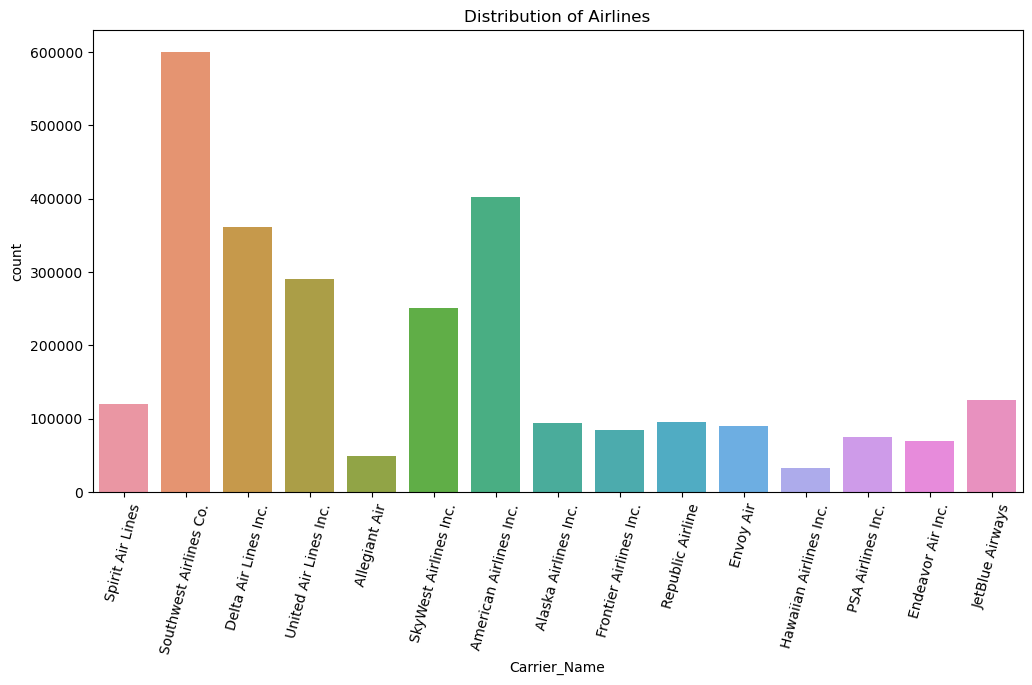

In [14]:
# Distribution of Airlines
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Carrier_Name')
plt.title('Distribution of Airlines')
plt.xticks(rotation=75)
plt.show()

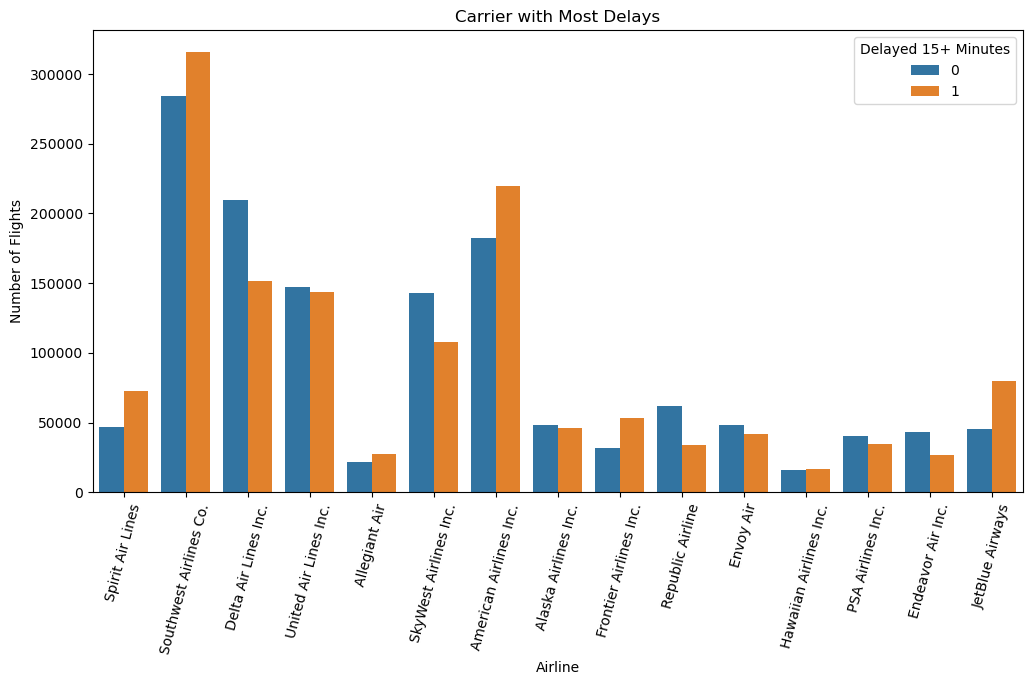

In [15]:
# Airlines with most delays 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Carrier_Name', hue=target)
plt.title('Carrier with Most Delays')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=75)
plt.legend(title='Delayed 15+ Minutes')
plt.show()

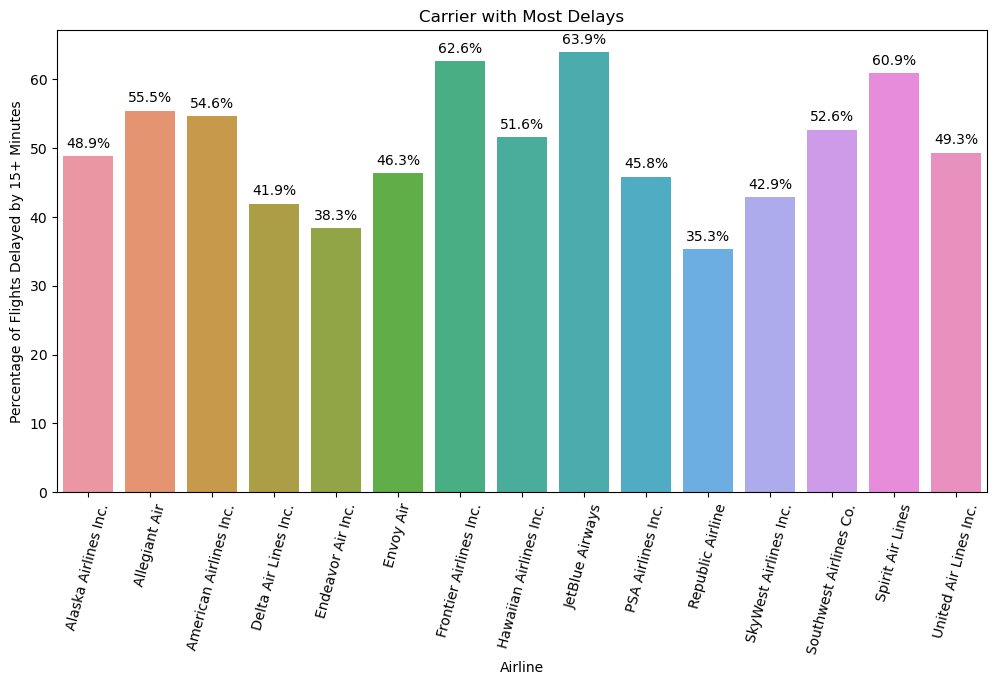

In [16]:
# Calculate the percentage of delays for each carrier
carrier_delay_percentages = df.groupby('Carrier_Name')[target].mean() * 100

# Reset index for plotting
carrier_delay_percentages = carrier_delay_percentages.reset_index()

# Plot the percentage of delays
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=carrier_delay_percentages, x='Carrier_Name', y=target)
plt.title('Carrier with Most Delays')
plt.xlabel('Airline')
plt.ylabel('Percentage of Flights Delayed by 15+ Minutes')
plt.xticks(rotation=75)

# Add percentage labels on the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()